# Form Data Analysis and Recommendations

This notebook analyzes data collected from a client's form containing birth month, state, and pet preference information. The goal is to validate the data, provide simple but meaningful visualizations, and make recommendations for improving the form to ensure accurate and consistent information collection.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset

form_df = pd.read_csv('form.csv')
print(form_df)

  birth_month         state   pet
0     January           NaN  Cats
1     January    California  Cats
2   September        Hawaii   Dog
3     January        Alaska   Dog
4        July  Rhode Island  Cats
5   September    California  Cats
6       April    California   Dog
7     January    California  Cats
8    November       Florida   Dog
9    December       Florida  Cats


In [4]:
# Basic data exploration
print("Dataset shape:", form_df.shape)
print("\nData types:")
print(form_df.dtypes)
print("\nMissing values:")
print(form_df.isnull().sum())
print("\nBasic statistics:")
print(form_df.describe(include='all'))

Dataset shape: (10, 3)

Data types:
birth_month    object
state          object
pet            object
dtype: object

Missing values:
birth_month    0
state          1
pet            0
dtype: int64

Basic statistics:
       birth_month       state   pet
count           10           9    10
unique           6           5     2
top        January  California  Cats
freq             4           4     6


## Data Visualizations

Let's create some simple but meaningful visualizations to understand the data better:

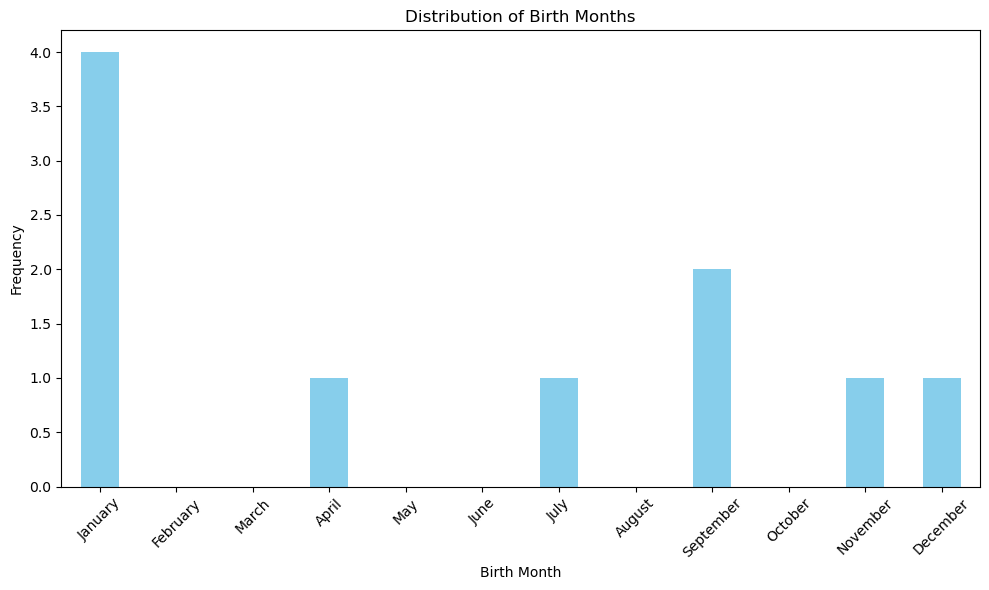

In [5]:
# 1. Birth Month Distribution
plt.figure(figsize=(10, 6))
birth_month_counts = form_df['birth_month'].value_counts().sort_index()

# Get the months in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex to include all months in order
birth_month_counts = birth_month_counts.reindex(month_order, fill_value=0)

birth_month_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Birth Months')
plt.xlabel('Birth Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

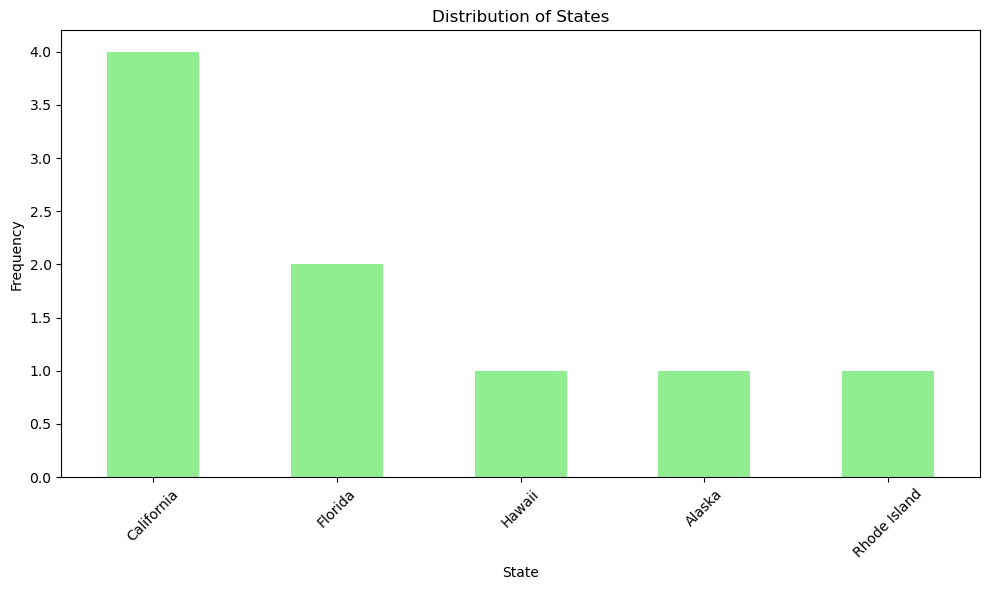

Number of missing values in 'state' column: 1 (10.0% of total)


In [6]:
# 2. State Distribution
plt.figure(figsize=(10, 6))
state_counts = form_df['state'].value_counts()
state_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the number of missing values for state
missing_states = form_df['state'].isnull().sum()
print(f"Number of missing values in 'state' column: {missing_states} ({missing_states/len(form_df)*100:.1f}% of total)")

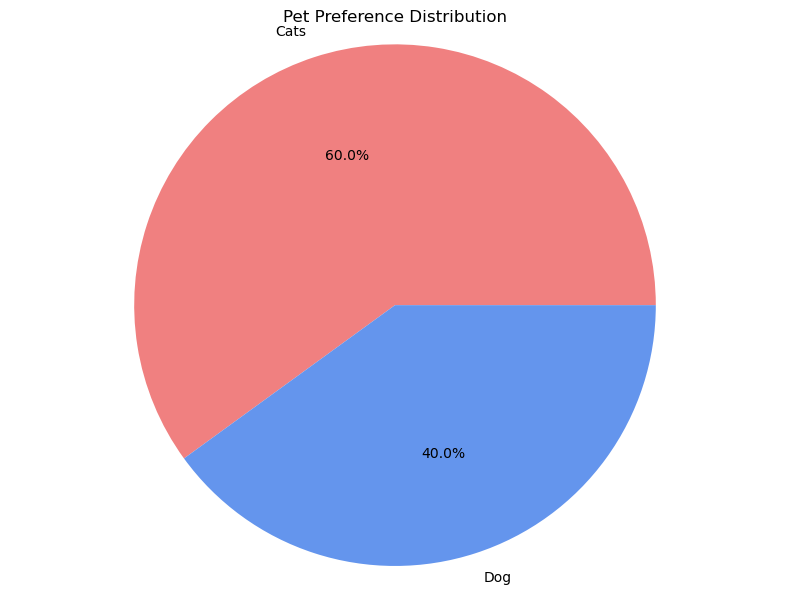

In [7]:
# 3. Pet Preference Distribution
plt.figure(figsize=(8, 6))
pet_counts = form_df['pet'].value_counts()
pet_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'cornflowerblue'])
plt.title('Pet Preference Distribution')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

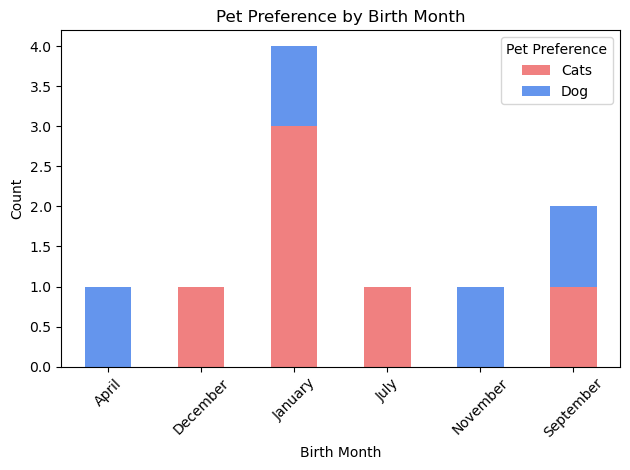

In [8]:
# 4. Relationship between Birth Month and Pet Preference
plt.figure(figsize=(12, 6))

# Create a crosstab between birth month and pet preference
month_pet_counts = pd.crosstab(form_df['birth_month'], form_df['pet'])

# Plot the stacked bar chart
month_pet_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'cornflowerblue'])
plt.title('Pet Preference by Birth Month')
plt.xlabel('Birth Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Pet Preference')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

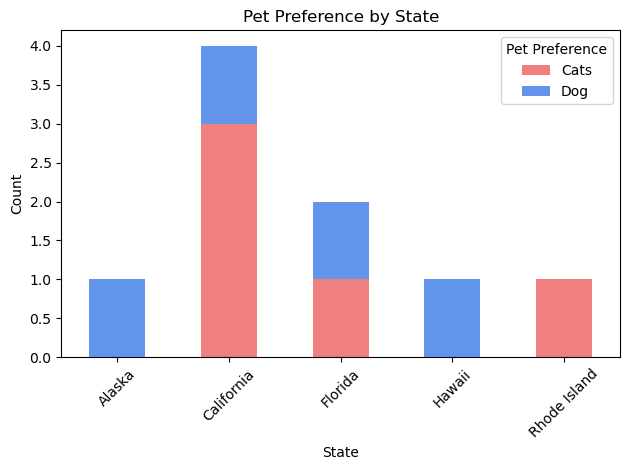

In [9]:
# 5. Relationship between State and Pet Preference
plt.figure(figsize=(12, 6))

# Remove missing state values for this visualization
state_pet_df = form_df.dropna(subset=['state'])

# Create a crosstab between state and pet preference
state_pet_counts = pd.crosstab(state_pet_df['state'], state_pet_df['pet'])

# Plot the stacked bar chart
state_pet_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'cornflowerblue'])
plt.title('Pet Preference by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Pet Preference')
plt.tight_layout()
plt.show()